In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data = pd.read_csv("../data/raw/IT Salary Survey EU  2020.csv")

In [8]:
data.head(15)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5,1,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",...,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
6,24/11/2020 11:16:35,37.0,Male,Berlin,Frontend Developer,6,0.4,Middle,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,11-50,Product,No,NaN,NaN
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5,1,Senior,Typescript,Javascript / Typescript,...,NaN,27,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,600
8,24/11/2020 11:17:24,29.0,Male,Berlin,Backend Developer,8,2,Senior,PHP,"SQL, AWS, Docker",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,30.0,NaN
9,24/11/2020 11:17:50,35.0,Male,Berlin,Software Engineer,15,3,Lead,Java,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,NaN


# 1. Descrição dos dados

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

## Tipos de variáveis

### Qualitativas:
#### Nominais:
* Company type
* Your main technology / programming language
* City 
* Other technologies/programming languages you use often 
* Employment status
* Main language at work
* Have you lost your job due to the coronavirus outbreak? 
* Position
#### Ordinais
* Seniority level 

### Quantitativas:
#### Continuas:
* Timestamp
 
#### Discretas
* Yearly brutto salary (without bonus and stocks) in EUR
* Yearly bonus + stocks in EUR 
* Company size
* Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country
* Annual bonus+stocks one year ago. Only answer if staying in same country
* Number of vacation days
* Years of experience in Germany  
* Total years of experience



## Estatística descritiva

In [22]:
## Verificando valores faltante
print("Quantidade de dados Faltantes :")
print(data.isna().sum())
print("-"*150)
print("Porcentagem de dados Faltante : ")
print(round(((data.isna().sum()/data.shape[0])*100),2))

Quantidade de dados Faltantes :
Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                

In [55]:
df_copy = data.copy()

## Perguntas que podemos fazer para os nossos dados:
* Quais as 5 profissões mais bem pagas e as 5 mais mal pagas?
* Quais cidades com as maiores medianas de salário?
* Qual a difeença entre a mediana dos salarios dos generos?
* Qual o tipo de contrato mais frequente?

In [23]:
data["Yearly brutto salary (without bonus and stocks) in EUR"]

0        80000.0
1        80000.0
2       120000.0
3        54000.0
4        62000.0
          ...   
1248     70000.0
1249     60000.0
1250    110000.0
1251     38350.0
1252     65000.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, Length: 1253, dtype: float64

In [38]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

### 1.Quais as 5 profissões mais bem pagas e as 5 mais mal pagas?

In [56]:
# removendo outliers
feature = 'Yearly brutto salary (without bonus and stocks) in EUR'

q1 = data[feature].quantile(0.25) 
q3 = data[feature].quantile(0.75) 
iqr = q3 - q1 

upper_limit = q3 + 1.5 * iqr 
lower_limit = q1 - 1.5 * iqr

# New DataFrame after removing the outlier 
data = data[(data[feature] > lower_limit) & (data[feature] < upper_limit)]


In [85]:
resultado_p1=data["Yearly brutto salary (without bonus and stocks) in EUR"].groupby(by=data["Position "]).sum()

In [86]:
resultado_p1.sort_values(ascending=False,inplace=True)

In [97]:
resultado_p1["Yearly brutto salary"]= resultado_p1["Yearly brutto salary (without bonus and stocks) in EUR"]/(new_df['Position '].value_counts()).sort_values(ascending = False)

In [99]:
resultado_p1.drop(columns=["Yearly brutto salary (without bonus and stocks) in EUR"], inplace=True)

In [132]:
resultado_p1

,Yearly brutto salary
Position,
Software Engineer,71362.421918
Backend Developer,70083.993789
Data Scientist,66778.431373
Frontend Developer,65222.732558
QA Engineer,61453.623188
...,...
Data analyst,36000.000000
Product Management Praktikant,35000.000000
Graphic Designer,32000.000000


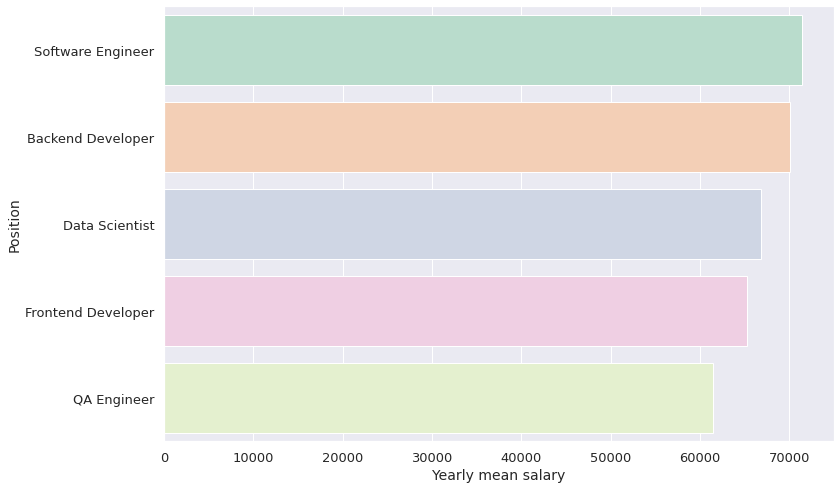

In [133]:
#resultado_p1 = resultado_p1.to_frame()

plt.figure(figsize=(12,8))

sns.barplot(data=resultado_p1.sort_values(by ="Yearly brutto salary", ascending = False), y=resultado_p1.index[:5],
            x= resultado_p1['Yearly brutto salary'].head(5),
            palette='Pastel2')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=13)
plt.xlabel("Yearly mean salary",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Position",fontsize=14)
plt.show()


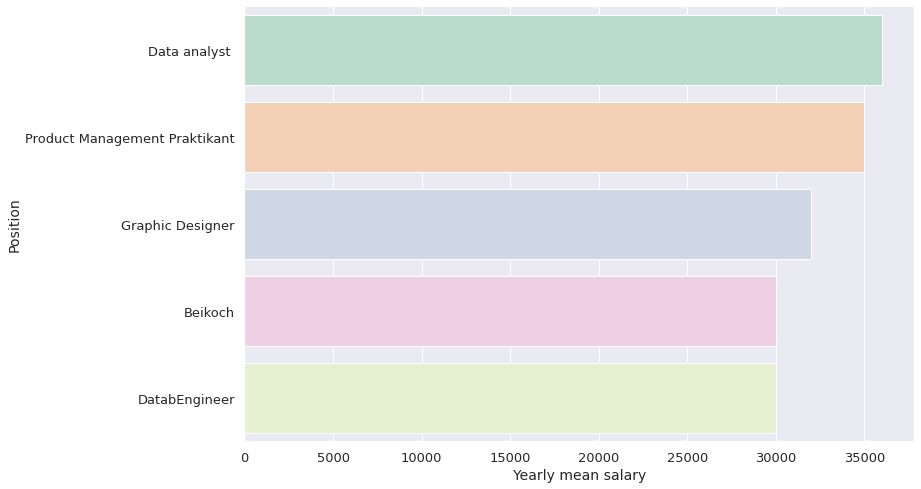

In [134]:

plt.figure(figsize=(12,8))

sns.barplot(data=resultado_p1, y=resultado_p1.index[-5:],
            x= resultado_p1['Yearly brutto salary'].tail(5),
            palette='Pastel2')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=13)
plt.xlabel("Yearly mean salary",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Position",fontsize=14)
plt.show()

### 2.Quais cidades com as maiores medianas de salário?

In [116]:
cities=data["Yearly brutto salary (without bonus and stocks) in EUR"].groupby(by=data["City"]).median()

In [125]:
cities.head(10)

,Yearly brutto salary (without bonus and stocks) in EUR
City,
Minsk,110000.0
Prefer not to say,110000.0
Milano,110000.0
Zurich,106000.0
City in Russia,100000.0
Schleswig-Holstein,93000.0
Copenhagen,92000.0
London,90000.0
Heilbronn,90000.0


In [118]:
cities.sort_values(ascending=False,inplace=True)

In [120]:
cities = cities.to_frame()

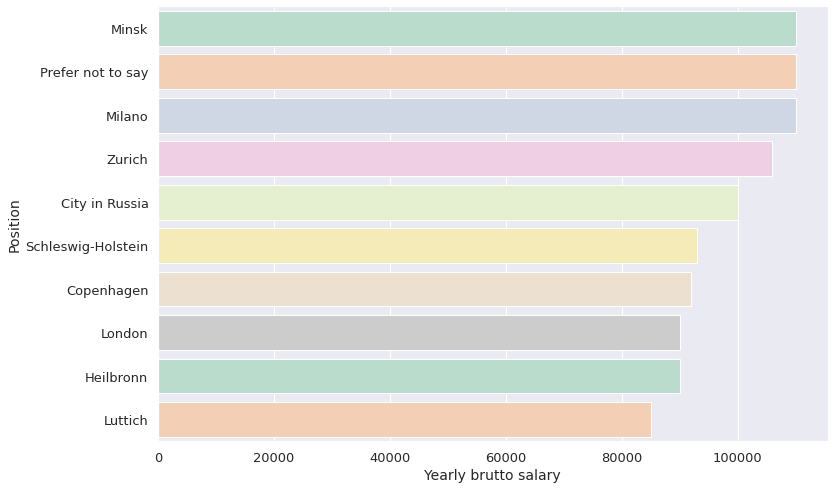

In [126]:
plt.figure(figsize=(12,8))

sns.barplot(data=cities, y=cities.index[:10],
            x= cities['Yearly brutto salary (without bonus and stocks) in EUR'].head(10),
            palette='Pastel2')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Position",fontsize=14)
plt.show()


### Qual a difeença entre a mediana dos salarios dos generos?

In [144]:
salarios_por_genero=data["Yearly brutto salary (without bonus and stocks) in EUR"].groupby(by=data["Gender"]).median()

In [145]:
salarios_por_genero = salarios_por_genero.to_frame()

In [146]:
salarios_por_genero.head()

,Yearly brutto salary (without bonus and stocks) in EUR
Gender,
Female,60000.0
Male,70000.0


### 4.Qual o tipo de contrato mais frequente?

In [149]:
data["Сontract duration"].value_counts()

Unlimited contract    1104
Temporary contract      45
Name: Сontract duration, dtype: int64

In [167]:
unlimited_contr_select = data["Company type"][data["Сontract duration"]=="Unlimited contract"]
size_unlimited = data["Company size"][data["Сontract duration"]=="Unlimited contract"]

In [168]:
unlimited_contr_select.value_counts().iloc[:10]

Product                699
Startup                217
Consulting / Agency    123
Bank                     4
E-commerce               3
Utilities                2
Media                    2
Finance                  2
FAANG                    1
Insurance                1
Name: Company type, dtype: int64

In [171]:
size_unlimited.value_counts().iloc[:10]

1000+       401
101-1000    373
11-50       155
51-100      132
up to 10     40
Name: Company size, dtype: int64

In [173]:
temporary_contr_select = data["Company type"][data["Сontract duration"]=="Temporary contract"]
size_temporary = data["Company size"][data["Сontract duration"]=="Temporary contract"]

In [172]:
temporary_contr_select.value_counts().iloc[:10]

Product                17
Startup                13
Consulting / Agency     5
Research                2
Personal Ltd            1
Game Company            1
University              1
Research institute      1
Institute               1
Fintech                 1
Name: Company type, dtype: int64

In [174]:
size_temporary.value_counts().iloc[:10]

101-1000    11
up to 10    11
1000+       10
11-50        6
51-100       5
Name: Company size, dtype: int64

O contrato mais frequente é o contrato ilimitado (não temporario)

Aque podemos ver empresas de pequeno ou medio porte  contratam mais funcionarios temporarios que empresas de grande porte, ainda que as empresas de grandes tenham o nuermo de funcionarios com contratos não temporarios grandes, o que levam em consideração a mudança de patamar.

Outro insight é que os 3 tipos de companias que mais contratam são  Produtos, Startups e Consultorias